In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from IPython.display import display, Latex, Markdown
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [3]:
def PRCurve(likelihood, y, stepArray = np.arange(0, 1, 0.1)) :
    if len(likelihood) != len(y) :
        return
    precision = np.zeros((len(stepArray) + 1, ))
    recall = np.zeros((len(stepArray) + 1, ))
    for i in range(0, len(stepArray)) :
        TP = 0
        FP = 0
        FN = 0
        for j in range(len(y)) :
            if (likelihood[j] < stepArray[i]) :
                if (y[j] == 0) :
                    None
                else :
                    FN += 1
            else :
                if (y[j] == 0) :
                    FP += 1
                else :
                    TP += 1
        if (TP != 0) :
            precision[i] = TP / (TP + FP)
            recall[i] = TP / (TP + FN)
    return precision, recall
    
def AUC(x, y) :
    s = 0
    for i in range(1, len(x)) :
        if x[i] != x[i - 1] :
            s += (y[i] + y[i - 1]) / 2 * (x[i] - x[i - 1])
    return abs(s)

def plotPR(precision, recall, isPrintAUC = True, scatter = False) :
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.title("PR curve")
    if scatter:
        plt.scatter(recall, precision)
    else:
        plt.plot(recall, precision)
    if isPrintAUC :
        plt.annotate("AUC = %.2f" %(AUC(recall, precision)), xy=(0.4, 0.2))
    plt.show()
    
def ROCCurve(likelihood, y, stepArray = np.arange(0, 1, 0.1)) :
    if len(likelihood) != len(y) :
        return
    TPR = np.zeros((len(stepArray) + 1, ))
    FPR = np.zeros((len(stepArray) + 1, ))
    for i in range(0, len(stepArray)) :
        TP = 0
        FP = 0
        FN = 0
        TN = 0
        for j in range(len(y)) :
            if likelihood[j] < stepArray[i] :
                if (y[j] == 0) :
                    TN += 1
                else :
                    FN += 1
            else :
                if (y[j] == 0) :
                    FP += 1
                else :
                    TP += 1
        if TP != 0 :
            TPR[i] = TP / (TP + FN)
        if FP != 0 :
            FPR[i] = FP / (FP + TN)
    return TPR, FPR

def plotROC(TPR, FPR, isPrintAUC = True, scatter = False) :
    plt.xlim(-0.01, 1.01)
    plt.ylim(-0.01, 1.01)
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC curve")
    if scatter:
        plt.scatter(FPR, TPR)
    else:
        plt.plot(FPR, TPR)
        
    if isPrintAUC :
        plt.annotate("AUC = %.2f" %(AUC(FPR, TPR)), xy=(0.4, 0.2))
    plt.show()


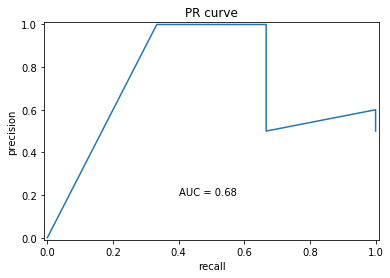

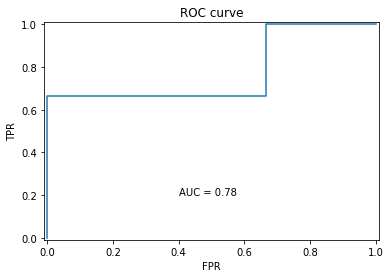

In [4]:
likelihood = np.array([0.14, 0.23, 0.39, 0.52, 0.73, 0.9])
likelihood = np.array([0.1, 0.2, 0.4, 0.5, 0.7, 0.9])
y = np.array([0, 1, 0, 0, 1, 1])

precision, recall = PRCurve(likelihood, y, np.arange(0, 1, 0.01))
plotPR(precision, recall)

TPR, FPR = ROCCurve(likelihood, y, np.arange(0, 1, 0.01))
plotROC(TPR, FPR)


In [5]:
dset = datasets.load_breast_cancer()
predictor = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                                            C=1.0, fit_intercept=True, intercept_scaling=1, 
                                            class_weight=None, random_state=None, solver='liblinear', 
                                            max_iter=100, multi_class='ovr', verbose=0, 
                                            warm_start=False, n_jobs=None)
train_data, test_data, train_labels, test_labels = train_test_split(dset.data, dset.target, test_size=0.33)
print(train_data)
print(train_labels)

[[9.668e+00 1.810e+01 6.106e+01 ... 2.500e-02 3.057e-01 7.875e-02]
 [1.953e+01 1.890e+01 1.295e+02 ... 1.980e-01 2.968e-01 9.929e-02]
 [1.504e+01 1.674e+01 9.873e+01 ... 1.018e-01 2.177e-01 8.549e-02]
 ...
 [1.973e+01 1.982e+01 1.307e+02 ... 2.507e-01 2.749e-01 1.297e-01]
 [1.276e+01 1.884e+01 8.187e+01 ... 8.312e-02 2.744e-01 7.238e-02]
 [1.746e+01 3.928e+01 1.134e+02 ... 2.066e-01 2.853e-01 8.496e-02]]
[1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1
 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0
 0 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1
 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1
 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0 1 1 1 0 0 1 1 1 0 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1
 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 0 

0.9308510638297872
[0.65425532 0.85416667 0.86619718 0.86619718 0.87234043 0.87857143
 0.88489209 0.88489209 0.88489209 0.89130435 0.89130435 0.89705882
 0.89705882 0.89705882 0.9037037  0.9037037  0.91044776 0.91044776
 0.91044776 0.91044776 0.91044776 0.91044776 0.91044776 0.91044776
 0.91729323 0.91666667 0.92307692 0.92307692 0.92307692 0.92307692
 0.92307692 0.92307692 0.92307692 0.92307692 0.92307692 0.92307692
 0.92307692 0.92307692 0.92248062 0.92248062 0.92248062 0.92248062
 0.92248062 0.92248062 0.9296875  0.9296875  0.9296875  0.9296875
 0.9296875  0.9296875  0.9296875  0.9296875  0.9296875  0.9296875
 0.9296875  0.9296875  0.9296875  0.9296875  0.9296875  0.9296875
 0.9296875  0.9296875  0.9296875  0.93700787 0.952      0.952
 0.952      0.952      0.952      0.9516129  0.9516129  0.95121951
 0.95901639 0.96694215 0.96694215 0.96694215 0.96694215 0.96694215
 0.96666667 0.96666667 0.96666667 0.96638655 0.96638655 0.96610169
 0.96610169 0.96610169 0.96610169 0.97435897 0.9743

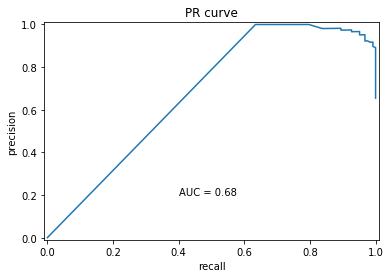

[1.         0.99186992 0.99186992 0.97560976 0.96747967 0.96747967
 0.96747967 0.95121951 0.92682927 0.         0.        ]
[1.         0.21538462 0.18461538 0.15384615 0.13846154 0.13846154
 0.09230769 0.06153846 0.04615385 0.         0.        ]


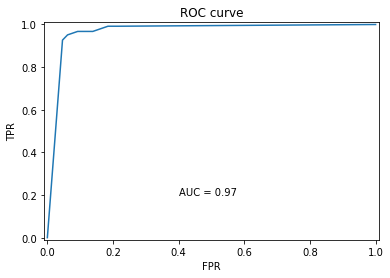

In [18]:
predictor.fit(train_data, train_labels)
likelihoods = predictor.predict_proba(test_data)

answers = predictor.predict(test_data)
equality = answers == test_labels
false_count = 0
true_count = 0

for label in equality:
    if label == True:
        true_count += 1
    else:
        false_count += 1
        
print(true_count / (true_count + false_count))

# print(equality)

# print(predictor.classes_)
likelihoods = [likelihoods[i][1] for i in range(len(likelihoods))]
# print(likelihoods)


precision, recall = PRCurve(likelihoods, test_labels, np.linspace(0, 1, 100))

print(precision)
print(recall)

plotPR(precision, recall, scatter=False)

TPR, FPR = ROCCurve(likelihoods, test_labels, np.linspace(0, 1, 10))
print(TPR)
print(FPR)
plotROC(TPR, FPR, scatter=False)

In [8]:
heart = pd.read_csv('D:\\programming\\machine learning class\\chd.csv', sep=',', header=0)
heart.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 11 columns):
row.names    462 non-null int64
sbp          462 non-null int64
tobacco      462 non-null float64
ldl          462 non-null float64
adiposity    462 non-null float64
famhist      462 non-null object
typea        462 non-null int64
obesity      462 non-null float64
alcohol      462 non-null float64
age          462 non-null int64
chd          462 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 39.8+ KB
[[1.481e+01 1.470e+01 9.466e+01 ... 7.955e-02 2.334e-01 6.142e-02]
 [1.275e+01 1.670e+01 8.251e+01 ... 8.045e-02 3.071e-01 8.557e-02]
 [1.801e+01 2.056e+01 1.184e+02 ... 1.489e-01 3.251e-01 7.625e-02]
 ...
 [1.727e+01 2.542e+01 1.124e+02 ... 1.739e-01 2.500e-01 7.944e-02]
 [1.300e+01 2.182e+01 8.750e+01 ... 2.060e-01 4.378e-01 1.072e-01]
 [1.278e+01 1.649e+01 8.137e+01 ... 5.882e-02 2.383e-01 6.410e-02]]
[1 1 0 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 1 

In [9]:
predictor = linear_model.LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                                            C=1.0, fit_intercept=True, intercept_scaling=1, 
                                            class_weight=None, random_state=None, solver='liblinear', 
                                            max_iter=100, multi_class='ovr', verbose=0, 
                                            warm_start=False, n_jobs=None)
train_data, test_data, train_labels, test_labels = train_test_split(dset.data, dset.target, test_size=0.33)
print(train_data)
print(train_labels)

[[1.243e+01 1.700e+01 7.860e+01 ... 2.832e-02 1.901e-01 5.932e-02]
 [1.390e+01 1.662e+01 8.897e+01 ... 6.222e-02 2.679e-01 7.698e-02]
 [1.678e+01 1.880e+01 1.093e+02 ... 1.474e-01 2.810e-01 7.228e-02]
 ...
 [1.169e+01 2.444e+01 7.637e+01 ... 1.308e-01 2.803e-01 9.970e-02]
 [8.734e+00 1.684e+01 5.527e+01 ... 0.000e+00 2.445e-01 8.865e-02]
 [1.338e+01 3.072e+01 8.634e+01 ... 7.763e-02 2.196e-01 7.675e-02]]
[1 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0
 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1
 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 0 1 0 0 0
 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1
 1 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1
 1 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1
 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 

[1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1]
[0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52
 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52
 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52
 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52
 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 

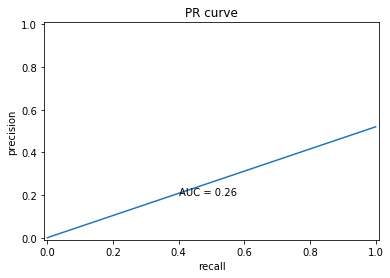

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


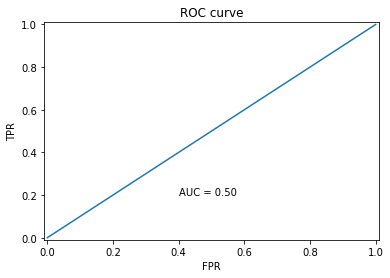

In [17]:
import random
N = 0.7
length = 100
likelihood = [N for i in range(length)]
random.seed(1230)
labels = [random.randrange(0, 2) for i in range(length)]
# labels = [0, 0, 1, 0, 0, 1, 0, 0, 0 ,0]
print(labels)

precision, recall = PRCurve(likelihood, labels, np.arange(0, 1, 0.01))
print(precision)
print(recall)
plotPR(precision, recall)


TPR, FPR = ROCCurve(likelihood, labels, np.arange(0, 1, 0.01))
print(TPR)
print(FPR)
plotROC(TPR, FPR)
